In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

#Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=500)
clf.fit(X_train, y_train)

#Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.93      0.96        14
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



C:\Users\leafy\2Jupyter\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


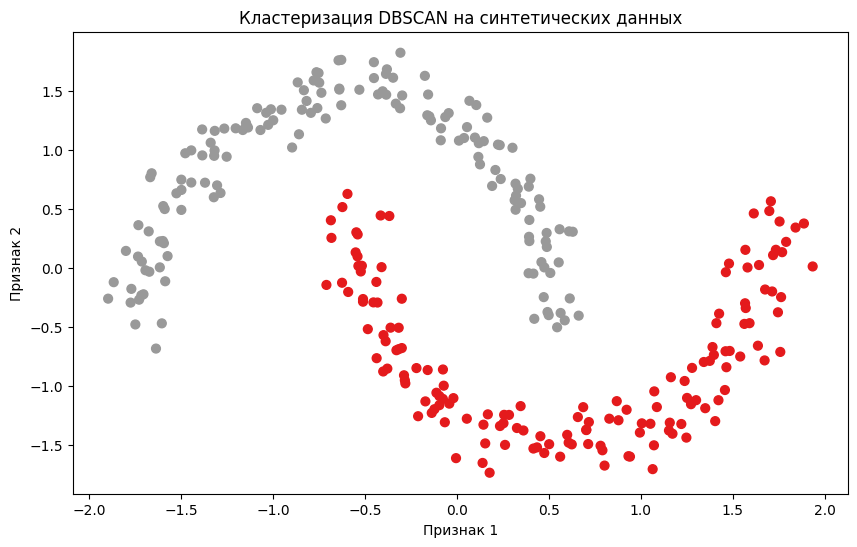

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Генерация синтетических данных: две полукруглые структуры + шум
X, _ = make_moons(n_samples=300, noise=0.07, random_state=42)

# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучение DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X_scaled)

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Set1', s=40)
plt.title("Кластеризация DBSCAN на синтетических данных")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()


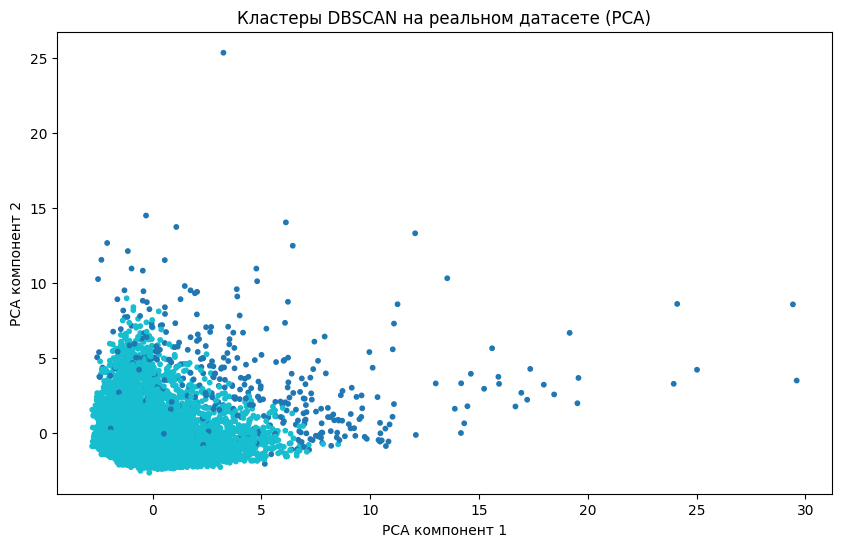

In [2]:
import pandas as pd
from sklearn.datasets import fetch_openml

# Загрузка реального датасета с OpenML (Credit Card Clients)
data = fetch_openml(data_id=43618, as_frame=True)
df = data.frame

# Предобработка: заполняем пропуски
df.fillna(df.median(numeric_only=True), inplace=True)

# Оставляем только числовые признаки
X_real = df.select_dtypes(include='number').values

# Масштабирование
X_real_scaled = scaler.fit_transform(X_real)

# DBSCAN на реальных данных
db_real = DBSCAN(eps=2.5, min_samples=10)  # eps подобран экспериментально
labels_real = db_real.fit_predict(X_real_scaled)

# Визуализация через PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_real_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_real, cmap='tab10', s=10)
plt.title("Кластеры DBSCAN на реальном датасете (PCA)")
plt.xlabel("PCA компонент 1")
plt.ylabel("PCA компонент 2")
plt.show()
